# Random Forest Regression

In [1]:
# using sklearn==0.18.2 and scipy==1.2.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data_set = pd.read_csv('Position_Salaries.csv')

In [3]:
data_set.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data_set.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 264.0+ bytes


## iloc is same as numpy's slicing

In [6]:
X = data_set.iloc[:,1:2].values # we canhav e either position or level ; we better take level

In [7]:
y = data_set.iloc[:,-1:].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# train test split

In [10]:
from sklearn.cross_validation import train_test_split

c:\users\skrstv\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 0)

## Random Forest
#### the training data is divided into many parts randomly and each is used to build a different decision tree
### the average of values predicted by all these trees is the predicted value

In [12]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators=10,random_state=0) 
regressor.fit(X,y)

c:\users\skrstv\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

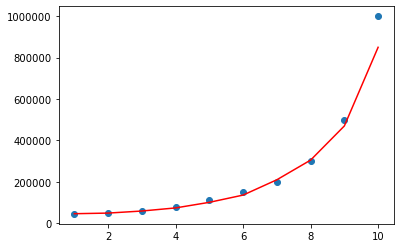

In [13]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X),color='red')

## graph in high resolution

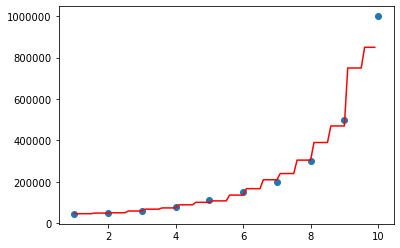

In [14]:
x = np.arange(min(X),max(X),.1)
x = np.arange(min(X),max(X),.1).reshape(len(x),1)
plt.scatter(X,y)
plt.plot(x,regressor.predict(x),color='red')

In [ ]:
## due to presence of many trees not just one the number of steps also increases 